In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.datasets import get_rdataset
from sklearn.preprocessing import StandardScaler
from ISLP import load_data

In [2]:
from sklearn.cluster import \
     (KMeans,
      AgglomerativeClustering)
from scipy.cluster.hierarchy import \
     (dendrogram,
      cut_tree)
from ISLP.cluster import compute_linkage

In [3]:
# Load the data

Auto = load_data('Auto')
Auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
name,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
ford torino,17.0,8,302.0,140,3449,10.5,70,1
...,...,...,...,...,...,...,...,...
ford mustang gl,27.0,4,140.0,86,2790,15.6,82,1
vw pickup,44.0,4,97.0,52,2130,24.6,82,2
dodge rampage,32.0,4,135.0,84,2295,11.6,82,1


In [4]:
# We can also impute the missing values of "horsepower" as we did previously

Auto['horsepower'].replace('?','104',inplace=True)
Auto['horsepower'] = pd.to_numeric(Auto['horsepower'])
Auto.dtypes

C:\Users\kate\AppData\Local\Temp\ipykernel_38288\1340562362.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Auto['horsepower'].replace('?','104',inplace=True)


mpg             float64
cylinders         int64
displacement    float64
horsepower        int64
weight            int64
acceleration    float64
year              int64
origin            int64
dtype: object

In [5]:
# We won't use "name" in clustering--there are way too many levels to be useful. 
# Instead, we'll make the name of each car the index, so that we can use it in dendrograms.

Auto.index = Auto['name']
Auto.drop(columns='name', axis=1, inplace=True)
Auto

KeyError: 'name'

In [ ]:
# Let's use just a sample of 10 vehicles to start
# We'll use this to get a sense of what the clusters seem to look like

import random
random.seed(10) # ALWAYS set the seed! Otherwise we can't replicate our results

# Create a random sample by randomly choosing row indices
index = random.sample(range(Auto.shape[0]), 10)

sample10 = Auto.iloc[index]
sample10

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
name,,,,,,,,
maxda glc deluxe,34.1,4,86.0,65,1975,15.2,79,3
amc hornet,18.0,6,199.0,97,2774,15.5,70,1
chevrolet caprice classic,17.5,8,305.0,145,3880,12.5,77,1
oldsmobile cutlass salon brougham,19.9,8,260.0,110,3365,15.5,78,1
mercedes benz 300d,25.4,5,183.0,77,3530,20.1,79,2
plymouth fury iii,14.0,8,440.0,215,4312,8.5,70,1
oldsmobile vista cruiser,12.0,8,350.0,180,4499,12.5,73,1
dodge colt m/m,33.5,4,98.0,83,2075,15.9,77,1
chevrolet malibu,20.5,6,200.0,95,3155,18.2,78,1


## Hierarchical Clustering

In [ ]:
# Let's do an initial clustering exercise on the Auto data as is

HClust = AgglomerativeClustering
hc_comp = HClust(distance_threshold=0,
                 n_clusters=None,
                 linkage='complete')
hc_comp.fit(sample10)

,n_clusters,None
,metric,'euclidean'
,memory,None
,connectivity,None
,compute_full_tree,'auto'
,linkage,'complete'
,distance_threshold,0
,compute_distances,False


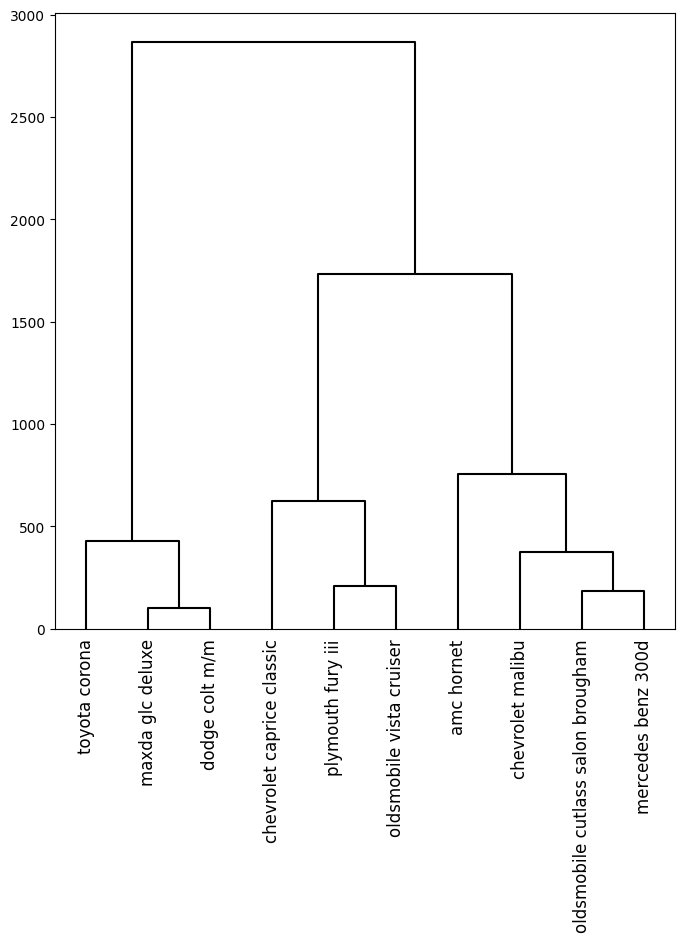

In [ ]:
# We can create a dendrogram using matplotlib

linkage_comp = compute_linkage(hc_comp)
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
dendrogram(linkage_comp,
           ax=ax,
           leaf_rotation=90,
           labels=sample10.index,
           color_threshold=-np.inf,
           above_threshold_color='black');

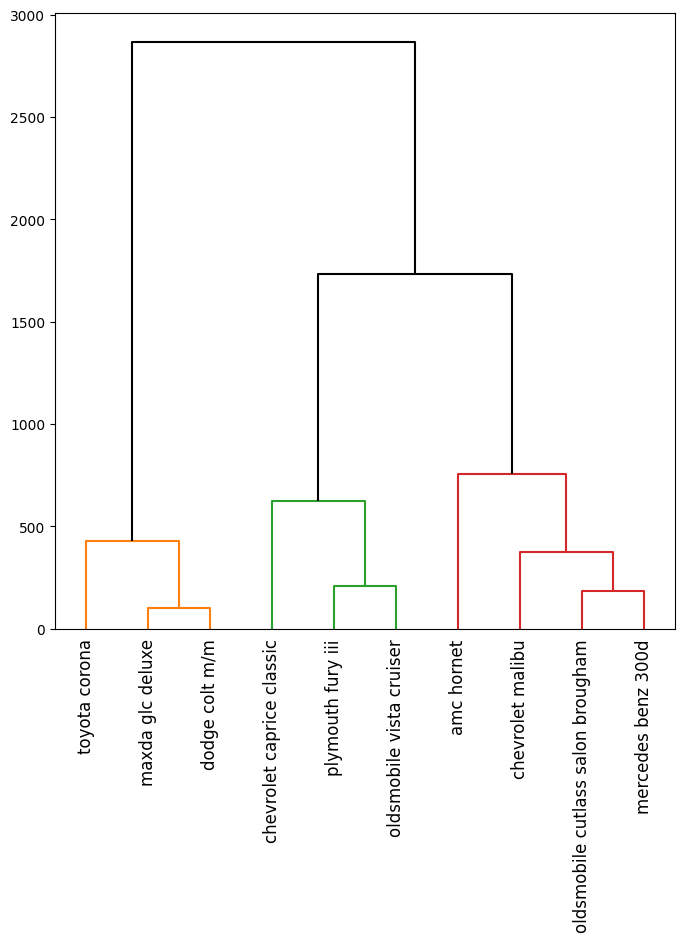

In [ ]:
# We can even add colors based on the selected clusters

fig, ax = plt.subplots(1, 1, figsize=(8, 8))
dendrogram(linkage_comp,
           ax=ax,
           leaf_rotation=90,
           labels=sample10.index,
           color_threshold=1000, # this is the important part 
           above_threshold_color='black');

In [ ]:
# We can cut the tree (by number of clusters or by height) to get an array of cluster assignments

cut_tree(linkage_comp, n_clusters=3).T
#cut_tree(linkage_comp, height=1000)

array([[0, 1, 2, 1, 1, 2, 2, 0, 1, 0]])

In [ ]:
# Let's attach the cluster assignments to our data
# and sort by cluster number

sample10['cluster']=cut_tree(linkage_comp, n_clusters=3)
sample10.sort_values('cluster')

C:\Users\kate\AppData\Local\Temp\ipykernel_40372\1814099651.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample10['cluster']=cut_tree(linkage_comp, n_clusters=3)


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,cluster
name,,,,,,,,,
maxda glc deluxe,34.1,4,86.0,65,1975,15.2,79,3,0
dodge colt m/m,33.5,4,98.0,83,2075,15.9,77,1,0
toyota corona,31.0,4,76.0,52,1649,16.5,74,3,0
oldsmobile cutlass salon brougham,19.9,8,260.0,110,3365,15.5,78,1,1
mercedes benz 300d,25.4,5,183.0,77,3530,20.1,79,2,1
amc hornet,18.0,6,199.0,97,2774,15.5,70,1,1
chevrolet malibu,20.5,6,200.0,95,3155,18.2,78,1,1
chevrolet caprice classic,17.5,8,305.0,145,3880,12.5,77,1,2
oldsmobile vista cruiser,12.0,8,350.0,180,4499,12.5,73,1,2


In [ ]:
# Hmm, our clusters seem to be highly influenced by "weight"

sample10.corr().style.background_gradient(cmap='coolwarm')

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,cluster
mpg,1.000000,-0.918681,-0.909348,-0.828797,-0.894313,0.530908,0.528792,0.697848,-0.938371
cylinders,-0.918681,1.000000,0.922417,0.841400,0.881008,-0.618561,-0.327372,-0.693135,0.911290
displacement,-0.909348,0.922417,1.000000,0.964484,0.934470,-0.731221,-0.477063,-0.643690,0.945778
horsepower,-0.828797,0.841400,0.964484,1.000000,0.864991,-0.842980,-0.540067,-0.619998,0.882925
weight,-0.894313,0.881008,0.934470,0.864991,1.000000,-0.495888,-0.262529,-0.637916,0.961366
acceleration,0.530908,-0.618561,-0.731221,-0.842980,-0.495888,1.000000,0.610372,0.334744,-0.591881
year,0.528792,-0.327372,-0.477063,-0.540067,-0.262529,0.610372,1.000000,0.279849,-0.388368
origin,0.697848,-0.693135,-0.643690,-0.619998,-0.637916,0.334744,0.279849,1.000000,-0.640513
cluster,-0.938371,0.911290,0.945778,0.882925,0.961366,-0.591881,-0.388368,-0.640513,1.000000


In [ ]:
# Remove the cluster assignment column so we can start over...

sample10.drop(columns='cluster', axis=1, inplace=True)

C:\Users\kate\AppData\Local\Temp\ipykernel_40372\325604847.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample10.drop(columns='cluster', axis=1, inplace=True)


In [ ]:
# Let's standardize the data before clustering

scaler = StandardScaler()
sample10_scale = scaler.fit_transform(sample10)
sample10_scale

array([[ 1.51835735, -1.23529412, -1.17303224, -0.94339466, -1.22095411,
         0.05202489,  1.05289947,  1.86052102],
       [-0.60549611, -0.05882353, -0.18161382, -0.29971387, -0.36999255,
         0.14957155, -1.6545563 , -0.62017367],
       [-0.67145429,  1.11764706,  0.74838931,  0.66580732,  0.80793422,
        -0.82589508,  0.45124263, -0.62017367],
       [-0.35485502,  1.11764706,  0.35357666, -0.03821855,  0.2594421 ,
         0.14957155,  0.75207105, -0.62017367],
       [ 0.37068498, -0.64705882, -0.32199165, -0.70201436,  0.43517258,
         1.64528705,  1.05289947,  0.62017367],
       [-1.13316157,  1.11764706,  1.93282724,  2.07385905,  1.26802858,
        -2.12651725, -1.6545563 , -0.62017367],
       [-1.39699429,  1.11764706,  1.14320195,  1.36983319,  1.4671898 ,
        -0.82589508, -0.75207105, -0.62017367],
       [ 1.43920753, -1.23529412, -1.06774887, -0.58132422, -1.11445079,
         0.27963377,  0.45124263, -0.62017367],
       [-0.2757052 , -0.05882353

In [ ]:
# We'll run the algorithm again
# Can we update this block to add colors for 3 clusters?

hc_comp_scale = HClust(distance_threshold=0,
                       n_clusters=None,
                       linkage='complete').fit(sample10_scale)
linkage_comp_scale = compute_linkage(hc_comp_scale)
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
dendrogram(linkage_comp_scale, ax=ax, 
           leaf_rotation=90, labels=sample10.index,
           color_threshold=-np.inf, above_threshold_color='black')
ax.set_title("Hierarchical Clustering with Scaled Features");

NameError: name 'HClust' is not defined

In [ ]:
# Let's compare the clusters from before and after standardizing

sample10['cluster'] = cut_tree(linkage_comp, n_clusters=3)
sample10['cluster_scale'] = cut_tree(linkage_comp_scale, n_clusters=3)
sample10.sort_values('cluster')

C:\Users\kate\AppData\Local\Temp\ipykernel_40372\2624432564.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample10['cluster'] = cut_tree(linkage_comp, n_clusters=3)
C:\Users\kate\AppData\Local\Temp\ipykernel_40372\2624432564.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample10['cluster_scale'] = cut_tree(linkage_comp_scale, n_clusters=3)


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,cluster,cluster_scale
name,,,,,,,,,,
maxda glc deluxe,34.1,4,86.0,65,1975,15.2,79,3,0,0
dodge colt m/m,33.5,4,98.0,83,2075,15.9,77,1,0,0
toyota corona,31.0,4,76.0,52,1649,16.5,74,3,0,0
oldsmobile cutlass salon brougham,19.9,8,260.0,110,3365,15.5,78,1,1,1
mercedes benz 300d,25.4,5,183.0,77,3530,20.1,79,2,1,1
amc hornet,18.0,6,199.0,97,2774,15.5,70,1,1,1
chevrolet malibu,20.5,6,200.0,95,3155,18.2,78,1,1,1
chevrolet caprice classic,17.5,8,305.0,145,3880,12.5,77,1,2,1
oldsmobile vista cruiser,12.0,8,350.0,180,4499,12.5,73,1,2,2


In [ ]:
# Other types of linkage

hc_sing_scale = HClust(distance_threshold=0,
                       n_clusters=None,
                       linkage='single').fit(sample10_scale)
linkage_sing_scale = compute_linkage(hc_sing_scale)

hc_avg_scale = HClust(distance_threshold=0,
                      n_clusters=None,
                      linkage='average').fit(sample10_scale)
linkage_avg_scale = compute_linkage(hc_avg_scale)

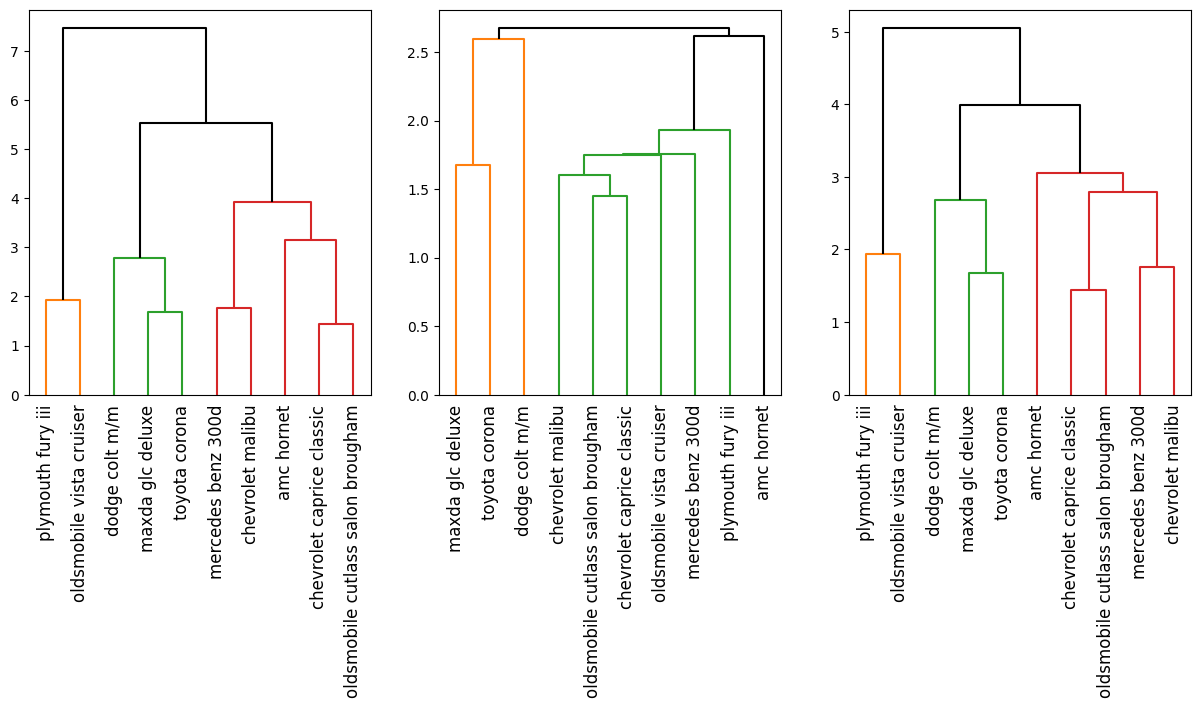

In [ ]:
fig, axes = plt.subplots(nrows=1,ncols=3,figsize=(15, 5))

dendrogram(linkage_comp_scale, ax=axes[0], 
           leaf_rotation=90, labels=sample10.index,
           color_threshold=5, above_threshold_color='black')
dendrogram(linkage_sing_scale, ax=axes[1], 
           leaf_rotation=90, labels=sample10.index,
           color_threshold=2.6, above_threshold_color='black')
dendrogram(linkage_avg_scale, ax=axes[2], 
           leaf_rotation=90, labels=sample10.index,
           color_threshold=3.5, above_threshold_color='black')
ax.set_title("Hierarchical Clustering with Scaled Features");

In [ ]:
# We're done with the hierarchical cluster assignment columns, so we'll drop them before moving on

sample10.drop(columns=['cluster','cluster_scale'], axis=1, inplace=True)

C:\Users\kate\AppData\Local\Temp\ipykernel_40372\4109568782.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample10.drop(columns=['cluster','cluster_scale'], axis=1, inplace=True)


## $K$-Means Clustering

In [ ]:
# Run a single K-means with K=3

kmeans = KMeans(n_clusters=3,
                random_state=1,
                n_init=1).fit(sample10_scale)

In [ ]:
# Get the cluster assignments 

cluster_km = pd.DataFrame(kmeans.labels_)
cluster_km.index=sample10.index
cluster_km

,0
name,
maxda glc deluxe,2
amc hornet,1
chevrolet caprice classic,1
oldsmobile cutlass salon brougham,1
mercedes benz 300d,0
plymouth fury iii,1
oldsmobile vista cruiser,1
dodge colt m/m,2
chevrolet malibu,0


In [ ]:
# Add the cluster assignments to the data

sample10['cluster_km']=cluster_km
sample10.sort_values('cluster_km')

C:\Users\kate\AppData\Local\Temp\ipykernel_40372\679916727.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample10['cluster_km']=cluster_km


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,cluster_km
name,,,,,,,,,
mercedes benz 300d,25.4,5,183.0,77,3530,20.1,79,2,0
chevrolet malibu,20.5,6,200.0,95,3155,18.2,78,1,0
oldsmobile cutlass salon brougham,19.9,8,260.0,110,3365,15.5,78,1,1
amc hornet,18.0,6,199.0,97,2774,15.5,70,1,1
oldsmobile vista cruiser,12.0,8,350.0,180,4499,12.5,73,1,1
plymouth fury iii,14.0,8,440.0,215,4312,8.5,70,1,1
chevrolet caprice classic,17.5,8,305.0,145,3880,12.5,77,1,1
maxda glc deluxe,34.1,4,86.0,65,1975,15.2,79,3,2
dodge colt m/m,33.5,4,98.0,83,2075,15.9,77,1,2


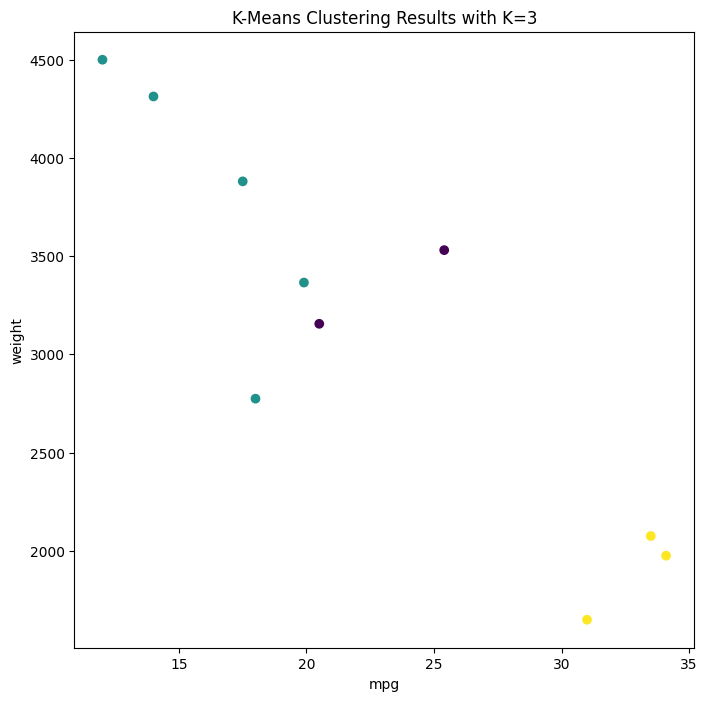

In [ ]:
# Even though the data is 8-dimensional, we can plot pairs at a time

fig, ax = plt.subplots(1, 1, figsize=(8,8))
ax.scatter(sample10['mpg'], sample10['weight'], c=sample10['cluster_km'])
ax.set_title("K-Means Clustering Results with K=3")
ax.set_xlabel('mpg')
ax.set_ylabel('weight');

In [ ]:
# What happens if we change the initial randomization?

kmeans2 = KMeans(n_clusters=3,
                random_state=2,
                n_init=1).fit(sample10_scale)
cluster_km2 = pd.DataFrame(kmeans2.labels_)
cluster_km2.index=sample10.index
cluster_km2

,0
name,
maxda glc deluxe,0
amc hornet,2
chevrolet caprice classic,2
oldsmobile cutlass salon brougham,2
mercedes benz 300d,0
plymouth fury iii,1
oldsmobile vista cruiser,2
dodge colt m/m,0
chevrolet malibu,0


In [ ]:
# That wasn't helpful at all...let's append that column of cluster assignments to the existing data

sample10['cluster_km2']=cluster_km2
sample10.sort_values('cluster_km2')

C:\Users\kate\AppData\Local\Temp\ipykernel_40372\4252976319.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample10['cluster_km2']=cluster_km2


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,cluster_km,cluster_km2
name,,,,,,,,,,
maxda glc deluxe,34.1,4,86.0,65,1975,15.2,79,3,2,0
mercedes benz 300d,25.4,5,183.0,77,3530,20.1,79,2,0,0
dodge colt m/m,33.5,4,98.0,83,2075,15.9,77,1,2,0
chevrolet malibu,20.5,6,200.0,95,3155,18.2,78,1,0,0
toyota corona,31.0,4,76.0,52,1649,16.5,74,3,2,0
plymouth fury iii,14.0,8,440.0,215,4312,8.5,70,1,1,1
oldsmobile cutlass salon brougham,19.9,8,260.0,110,3365,15.5,78,1,1,2
chevrolet caprice classic,17.5,8,305.0,145,3880,12.5,77,1,1,2
oldsmobile vista cruiser,12.0,8,350.0,180,4499,12.5,73,1,1,2


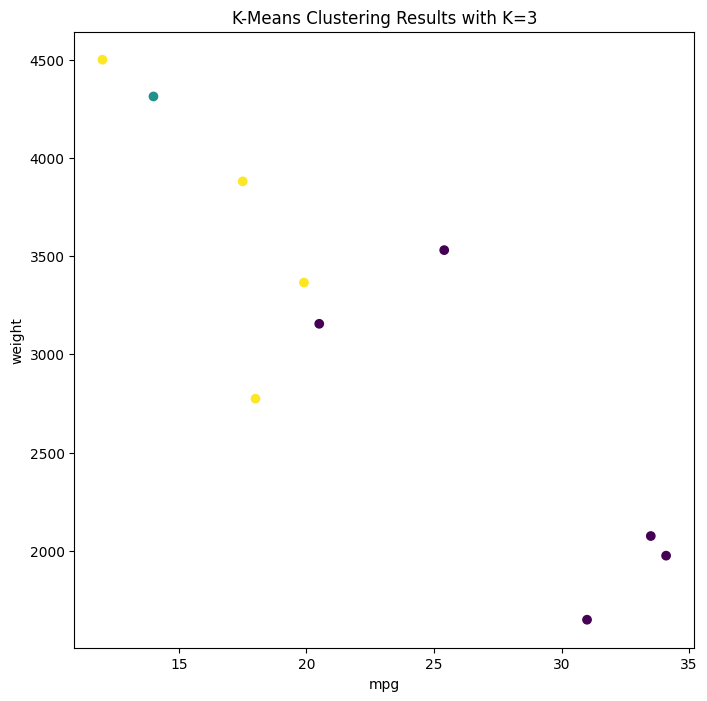

In [ ]:
# Here is a plot of the new clusters produced with a different randomization. Totally different!

fig, ax = plt.subplots(1, 1, figsize=(8,8))
ax.scatter(sample10['mpg'], sample10['weight'], c=sample10['cluster_km2'])
ax.set_title("K-Means Clustering Results with K=3")
ax.set_xlabel('mpg')
ax.set_ylabel('weight');

In [ ]:
# We can automatically have the algorithm repeat itself many times and then take the optimal answer...
# here we use 100 iterations.

kmeans3 = KMeans(n_clusters=3,
                random_state=1,
                n_init=100).fit(sample10_scale)
cluster_km3 = pd.DataFrame(kmeans3.labels_)
cluster_km3.index=sample10.index
cluster_km3

,0
name,
maxda glc deluxe,1
amc hornet,2
chevrolet caprice classic,0
oldsmobile cutlass salon brougham,2
mercedes benz 300d,2
plymouth fury iii,0
oldsmobile vista cruiser,0
dodge colt m/m,1
chevrolet malibu,2


In [ ]:
sample10['cluster_km3']=cluster_km3
sample10.sort_values('cluster_km3')

C:\Users\kate\AppData\Local\Temp\ipykernel_40372\4152311095.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample10['cluster_km3']=cluster_km3


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,cluster_km,cluster_km2,cluster_km3
name,,,,,,,,,,,
chevrolet caprice classic,17.5,8,305.0,145,3880,12.5,77,1,1,2,0
plymouth fury iii,14.0,8,440.0,215,4312,8.5,70,1,1,1,0
oldsmobile vista cruiser,12.0,8,350.0,180,4499,12.5,73,1,1,2,0
maxda glc deluxe,34.1,4,86.0,65,1975,15.2,79,3,2,0,1
dodge colt m/m,33.5,4,98.0,83,2075,15.9,77,1,2,0,1
toyota corona,31.0,4,76.0,52,1649,16.5,74,3,2,0,1
oldsmobile cutlass salon brougham,19.9,8,260.0,110,3365,15.5,78,1,1,2,2
amc hornet,18.0,6,199.0,97,2774,15.5,70,1,1,2,2
mercedes benz 300d,25.4,5,183.0,77,3530,20.1,79,2,0,0,2


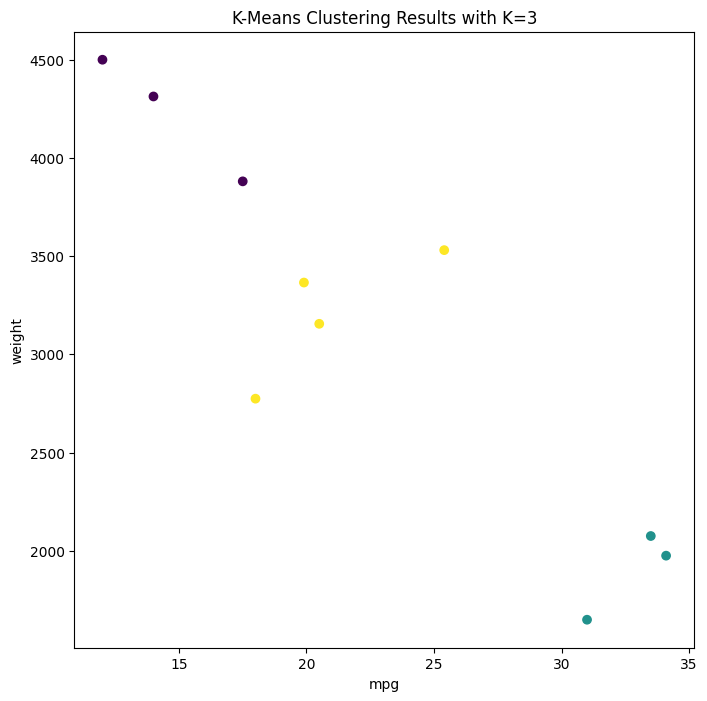

In [ ]:
# Here is the plot for the 'optimal'

fig, ax = plt.subplots(1, 1, figsize=(8,8))
ax.scatter(sample10['mpg'], sample10['weight'], c=sample10['cluster_km3'])
ax.set_title("K-Means Clustering Results with K=3")
ax.set_xlabel('mpg')
ax.set_ylabel('weight');

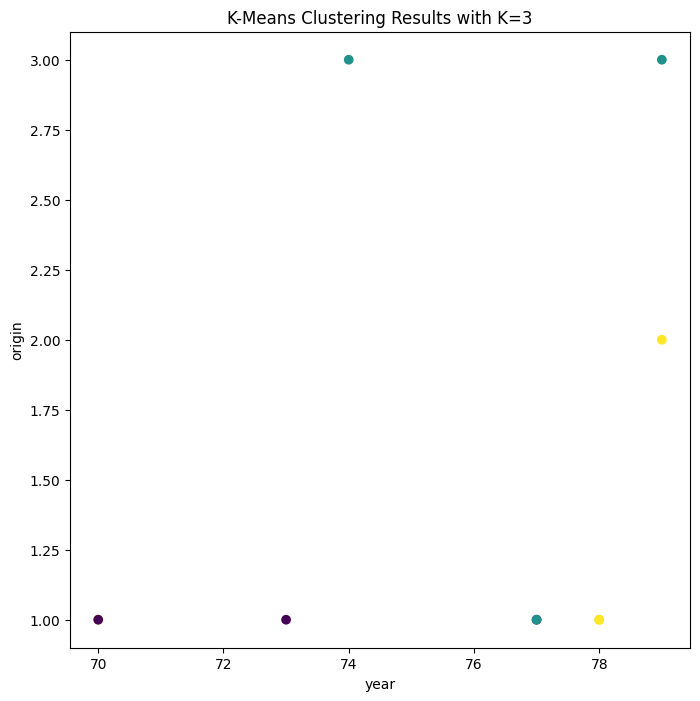

In [ ]:
# we can plot by different variables, too
# can you find a pair of variables that show a meaningful difference between the clusters?

fig, ax = plt.subplots(1, 1, figsize=(8,8))
ax.scatter(sample10['year'], sample10['origin'], c=sample10['cluster_km3'])
ax.set_title("K-Means Clustering Results with K=3");
ax.set_xlabel('year')
ax.set_ylabel('origin');

In [ ]:
# We can create a function to run k-means and make these plots automatically

def kmeans_plot(data=sample10,n_clusters=3,var1='mpg',var2='weight'):
    data_scale = scaler.fit_transform(data)
    kmeans = KMeans(n_clusters=n_clusters,
                    random_state=1,
                    n_init=100).fit(data_scale)
    cluster_km = pd.DataFrame(kmeans.labels_)
    cluster_km.index=data.index
    fig, ax = plt.subplots(1, 1, figsize=(8,8))
    ax.scatter(data[var1], data[var2], c=cluster_km)
    ax.set_title("K-Means Clustering Results with K={}".format(n_clusters))
    ax.set_xlabel(var1)
    ax.set_ylabel(var2);

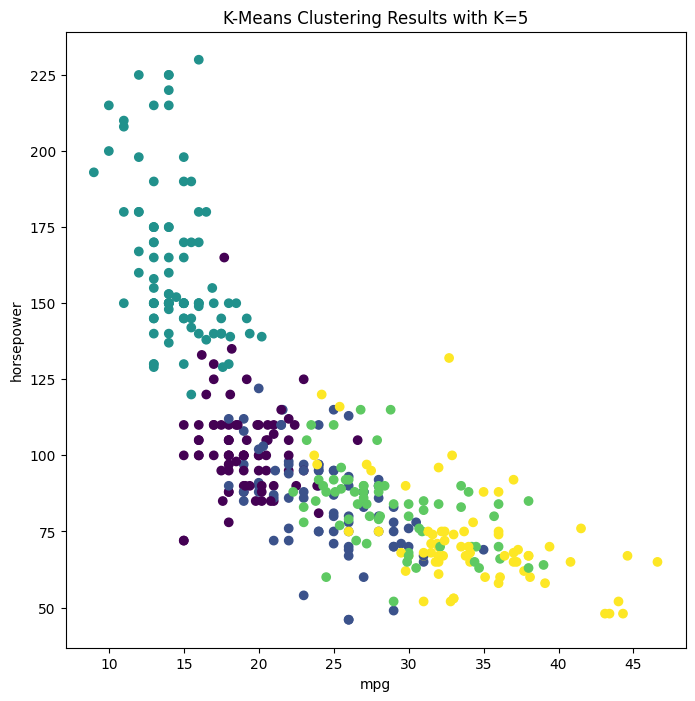

In [ ]:
# can you find a pair of variables that are important when you have 5 different clusters?

kmeans_plot(data=Auto,
            n_clusters=5,
            var1='mpg',
            var2='horsepower')

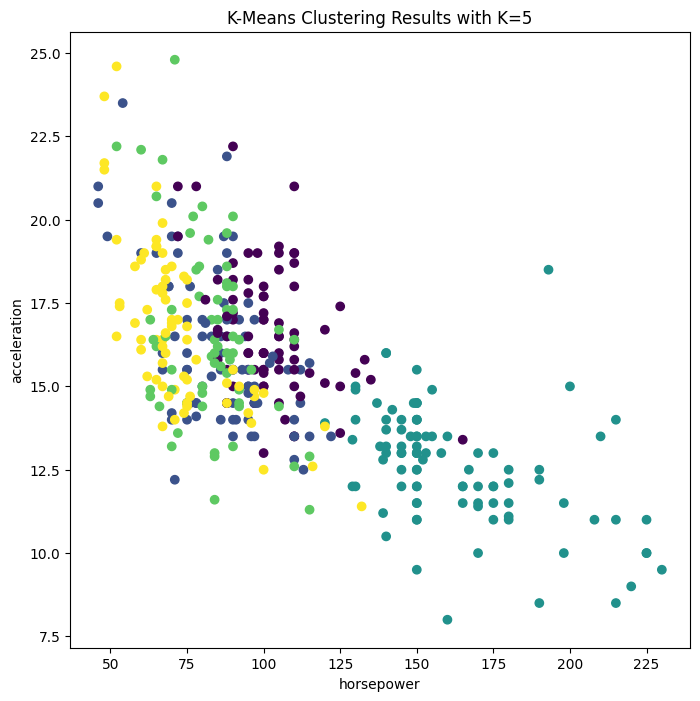

In [ ]:
kmeans_plot(data=Auto,
            n_clusters=5,
            var1='horsepower',
            var2='acceleration')